In [21]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from typing import Any, Dict, Tuple, Union

In [2]:
filename = "../../data/Galaxy10_DECals.h5"

with h5py.File(filename, "r") as f:

    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array
    ra = f['ra'][()]
    dec = f['dec'][()]
    z = f['redshift'][()]
    label = f['ans'][()]
    images = f['images'][()]

Keys: <KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>


In [25]:
def add_poisson_noise(image: np.array, intensity: float):
    """
    Adds Poisson noise to an image with a specified intensity.

    Args:
        image (numpy.ndarray): The input image is a 256 x 256 x 3 numpy array.
        intensity (float): The intensity of the Poisson noise to add.

    Returns:
        numpy.ndarray: The noisy image as a 256 x 256 x 3 numpy array.
    """
    # Compute the Poisson noise with the specified intensity
    noise = poisson.rvs(intensity * image)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    return noisy_image

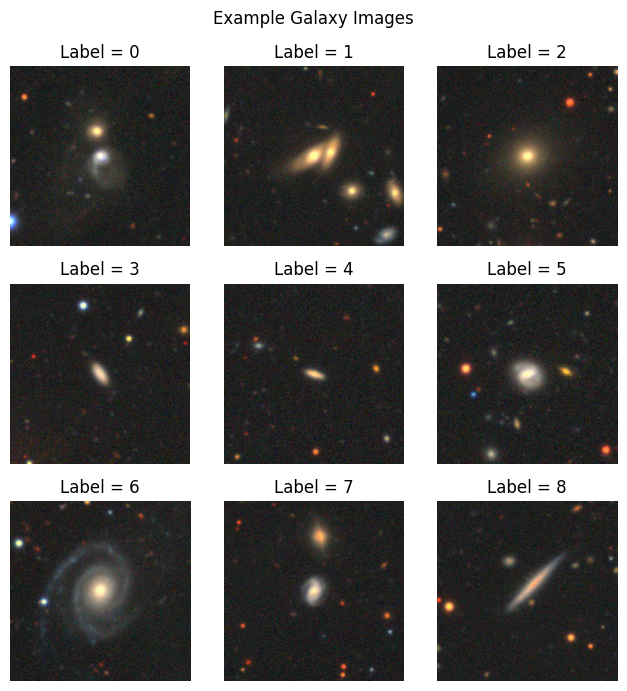

In [18]:
fig = plt.figure(figsize=(7,7))
for i in range(3*3):
    fig.suptitle('Example Galaxy Images')
    ax = fig.add_subplot(3,3, i+1)
    ax.axis('off')
    idx = np.where(label == i)[0][1]
    plt.imshow(images[idx])
    plt.grid(None)
    plt.tight_layout()
    plt.title(f'Label = {label[idx]}')

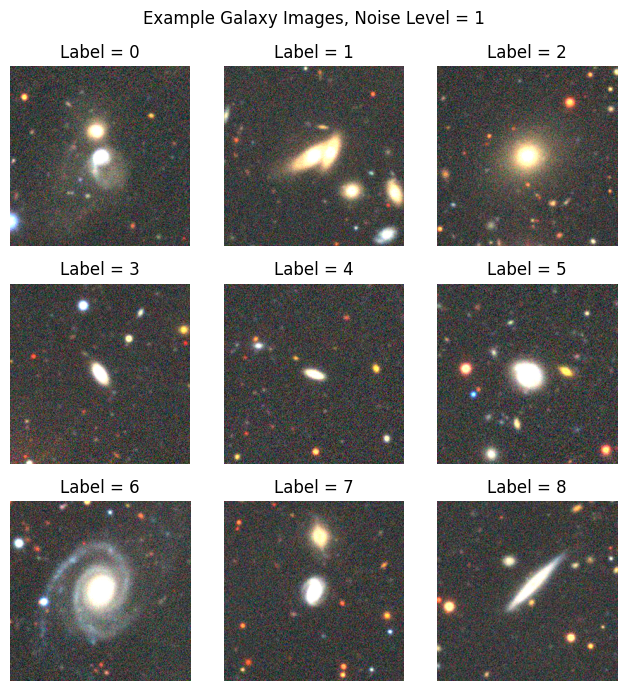

In [29]:
noise_level = 1
fig = plt.figure(figsize=(7,7))
for i in range(3*3):
    fig.suptitle(f'Example Galaxy Images, Noise Level = {noise_level}')
    ax = fig.add_subplot(3,3, i+1)
    ax.axis('off')
    idx = np.where(label == i)[0][1]
    plt.imshow(add_poisson_noise(images[idx], noise_level))
    plt.grid(None)
    plt.tight_layout()
    plt.title(f'Label = {label[idx]}')
    plt.savefig('../../plots/noise_galaxies.png')